In [1]:
import cv2, sys, os, time
import numpy as np
import pickle
import matplotlib.pyplot as plt 

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from utils.detection_tools import extract_object_and_background_masks
from utils.detection_tools import detect_sky, estimate_horizon_line_by_edges
from utils.detection_tools import rectify_horizon, downsampler, rotate_and_center_horizon
from utils.common_tools import annotate_image, show_bgr
from utils.common_tools import find_nonzero_bounding_box, trim_video, draw_parallel_lines

from utils.detection_tools import get_min_max_hsv, extract_contour_region
from utils.detection_tools import detect_sky, estimate_horizon_line_by_edges
from utils.detection_tools import  downsampler, rotate_and_center_horizon
from utils.common_tools import annotate_image, show_bgr, draw_parallel_lines
from utils.detection_tools import  plot_min_max_lab_colors, create_lab_range_mask, expand_mask
from utils.detection_tools import get_min_max_lab_values, create_donut_mask_with_exclusion

from src.detect_basic import detect_basic



In [2]:
# load in foi_2.png with opencv
#frame = frame[0:200,0:600] #for foi_2b
#show_bgr(frame,w=10)

#get first frame from basic_dot.mp4
#cap = cv2.VideoCapture('synth_track_video.mp4')
#ret, frame = cap.read()

(731, 624, 3)


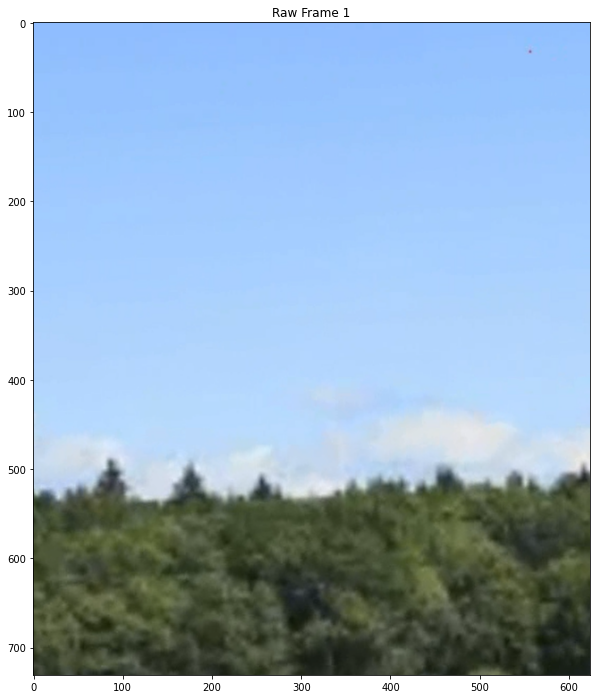

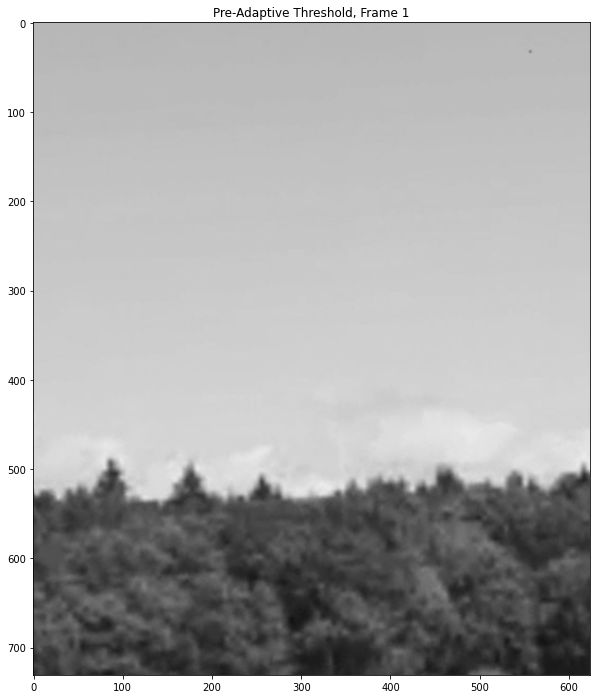

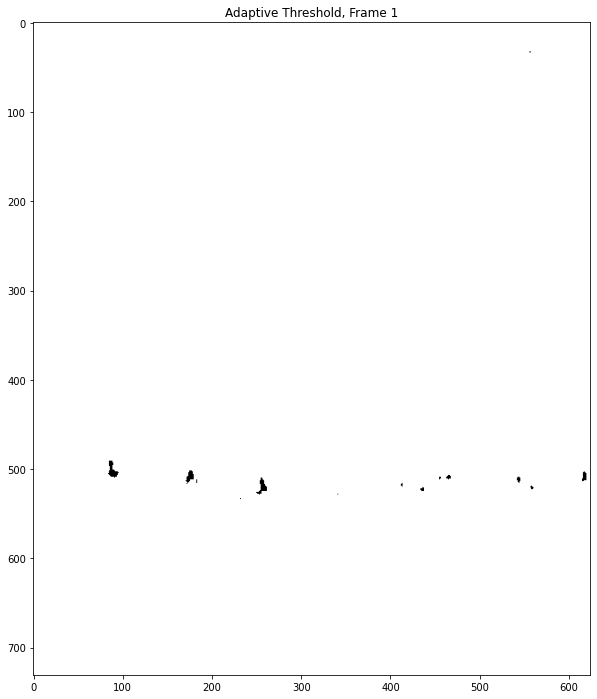

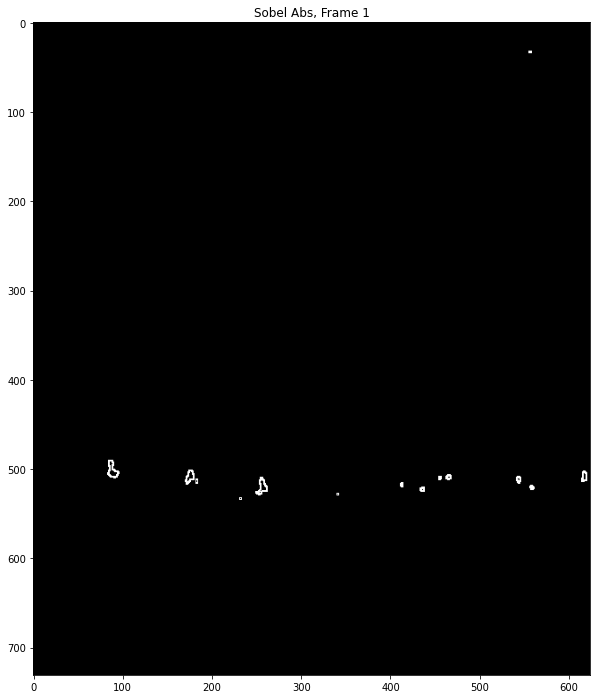

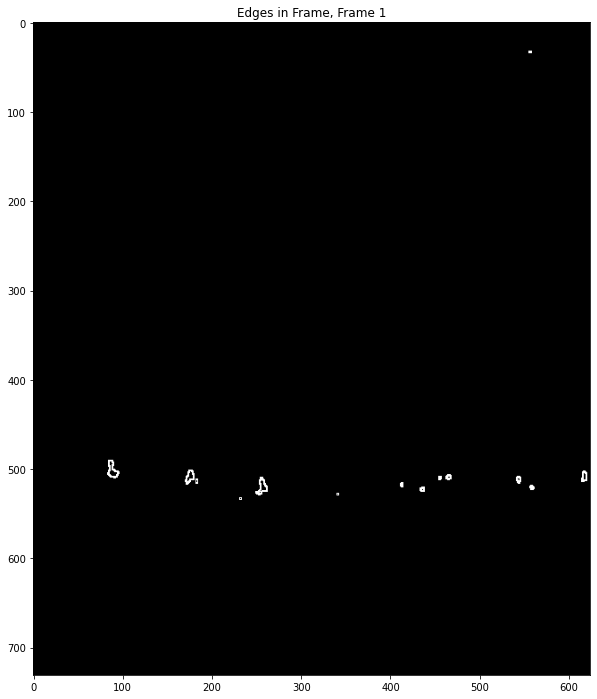

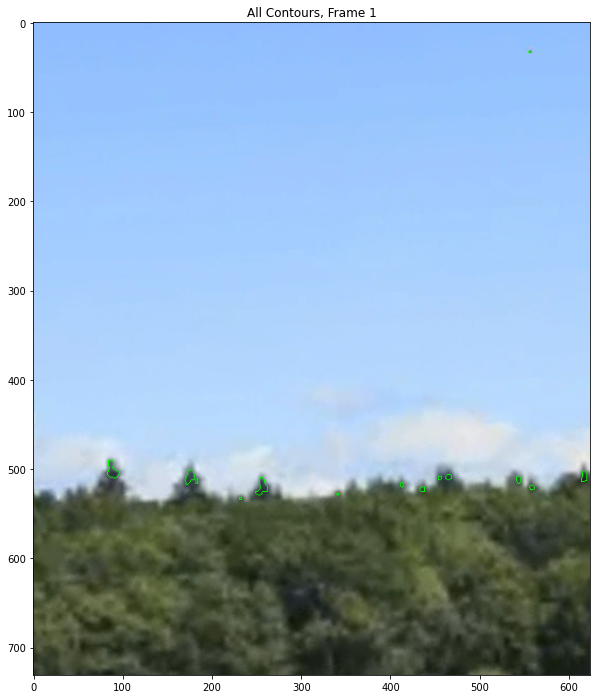

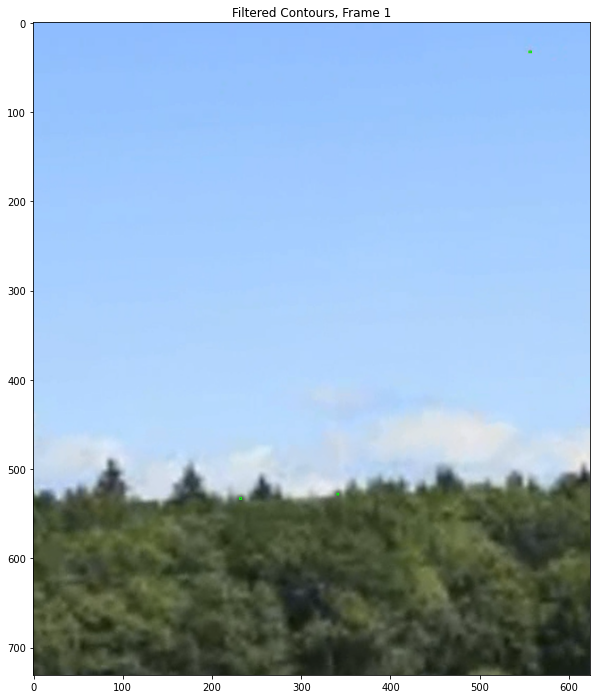

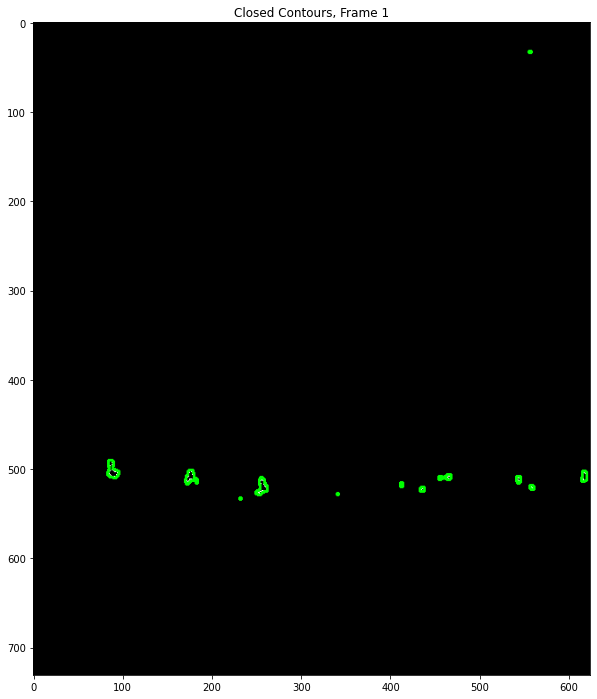

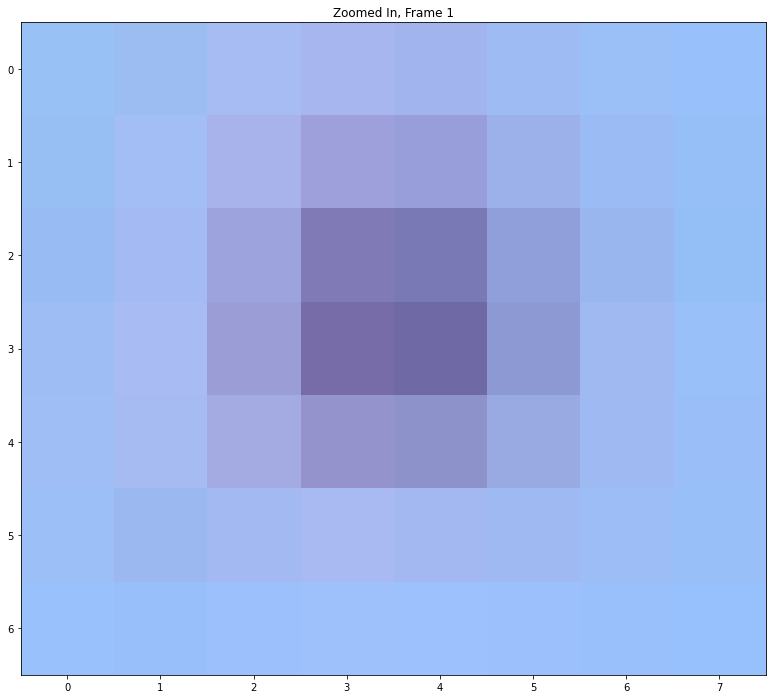

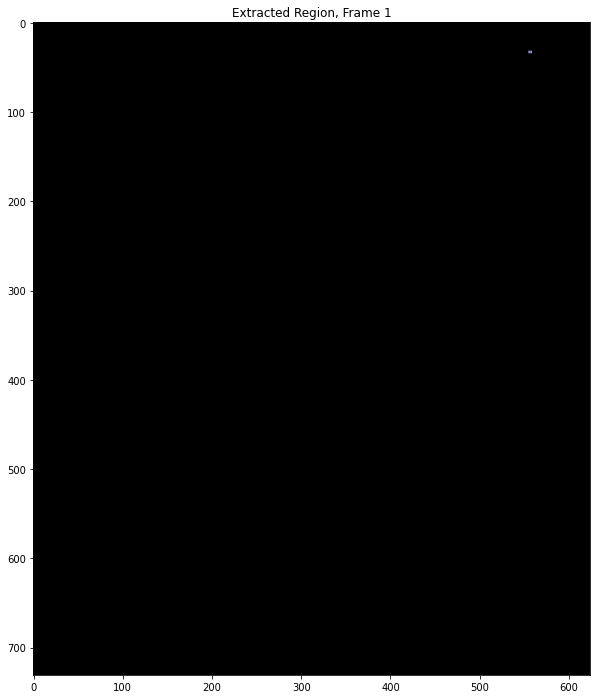

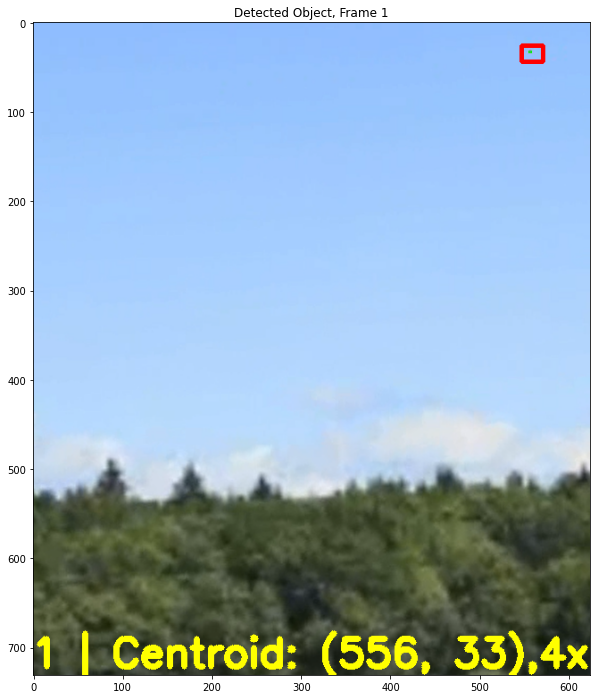

556 33 4 3


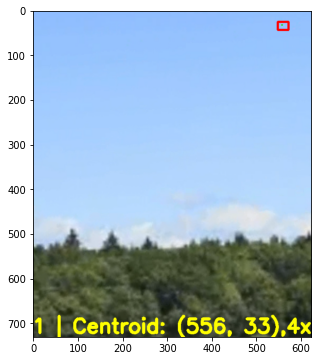

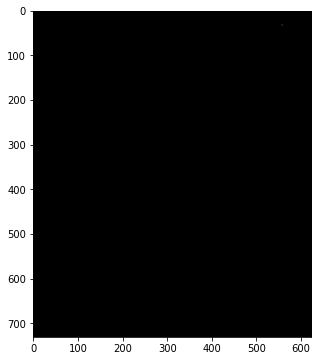

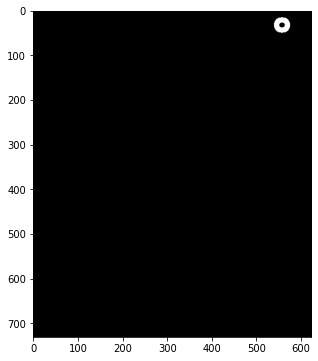

[193 123  92] [201 132  98]


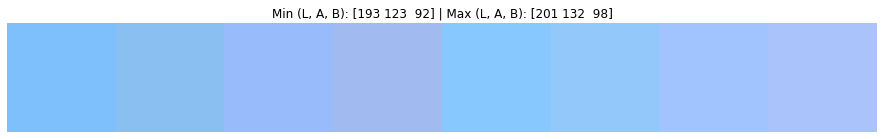

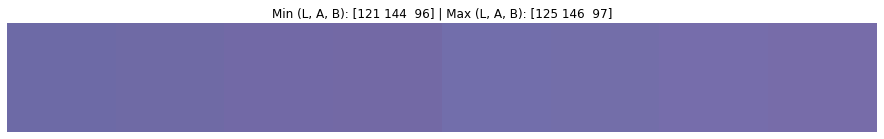

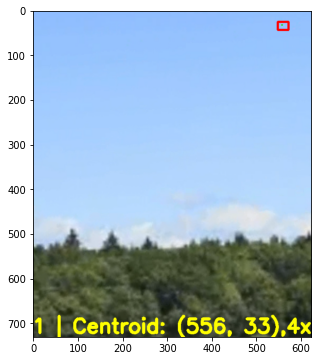

In [6]:
frame = cv2.imread('../resources/foi_2b.png')
#Print out the shape of the frame
print(frame.shape)
#frame = cv2.imread('../frame_50/0_raw_frame.png')
#frame = frame[0:100,0:600]#:250,550:650]

complete_frame, x,y,w,h, contour_mask, identified_object = detect_basic(frame,1,debug=True,
                                                                        debug_image_width=20,save_figs=False)
print(x,y,w,h)
show_bgr(complete_frame, w=10)
#shrink the contour mask by 1 pixel 
contour_mask = cv2.erode(contour_mask, np.ones((3,3), np.uint8), iterations=1)
show_bgr(contour_mask, w=10)

background_mask = create_donut_mask_with_exclusion(frame, identified_object,
                                       outer_pad_ratio=2,
                                       exclusion_pad_ratio=1)

show_bgr(background_mask, w=10)


b_min, b_max = get_min_max_lab_values(frame, background_mask)
o_min, o_max = get_min_max_lab_values(frame, contour_mask)
print(b_min,b_max)
plot_min_max_lab_colors(b_min, b_max)
plot_min_max_lab_colors(o_min, o_max)
show_bgr(complete_frame, w=10)

In [4]:
print(o_min,o_max)

[121 144  96] [125 146  97]


In [5]:
#frame = cv2.imread('foi_2b.png')
#load in video auto_startup/synth_track_video.mp4

cap = cv2.VideoCapture("synth_track_video_clouds.mp4")


for i in range(0, 61):
            if i % 10 == 0:
                print(f"Processing frame {i}...")

            frame_number = i
            # Set the frame position (0-based index)
            frame_index = frame_number - 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

            # Read the frame
            ret, raw_frame = cap.read()
            if not ret:
                print(f"Frame {frame_index} could not be read.")
                continue


            complete_frame, x,y,w,h, contour_mask, identified_object= detect_basic(raw_frame,1,debug=False,
                                                                                    debug_image_width=20,
                                                                                    b_range = (b_min, b_max),
                                                                                    o_range = (o_min, o_max))
            print(x,y)
            #show_bgr(complete_frame, w=10)


Processing frame 0...
Frame -1 could not be read.
Frame 0 could not be read.
Frame 1 could not be read.
Frame 2 could not be read.
Frame 3 could not be read.
Frame 4 could not be read.
Frame 5 could not be read.
Frame 6 could not be read.
Frame 7 could not be read.
Frame 8 could not be read.
Processing frame 10...
Frame 9 could not be read.
Frame 10 could not be read.
Frame 11 could not be read.
Frame 12 could not be read.
Frame 13 could not be read.
Frame 14 could not be read.
Frame 15 could not be read.
Frame 16 could not be read.
Frame 17 could not be read.
Frame 18 could not be read.
Processing frame 20...
Frame 19 could not be read.
Frame 20 could not be read.
Frame 21 could not be read.
Frame 22 could not be read.
Frame 23 could not be read.
Frame 24 could not be read.
Frame 25 could not be read.
Frame 26 could not be read.
Frame 27 could not be read.
Frame 28 could not be read.
Processing frame 30...
Frame 29 could not be read.
Frame 30 could not be read.
Frame 31 could not be r